In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## 2.4.2 Assignment 3 Problem (20 points): Test other PRNGs

You will now explore the randomness of some other PRNG's

**Problem (10 points):** Consider again the Randu PRNG discussed above. Without resorting to the hyperplane method, but rather by looking directly at the bits, show that the sequence of numbers it produces has lots of hidden symmetry.

**Problem (10 points):** Now consider the PRNG 
$$x_{i+1}=\left(9806x_i+1\right)\,\mbox{mod}\,\left(2^{17}-1\right).$$
Show that this PRNG samples integers quite uniformly, but suffers from a catastrophic seed problem: for one choice of seed, the output repeats forever.

In [0]:
class Rdnums(object):
    
    
    ## Functions for the first part of 1
    
    def __init__(self,data):
        
        #initial data
        self.data = data
        
        #instances for the first part of the question
        self.Random_nums = self.randu_prng()
        self.desired_bits = self.bits()
        
        #instances for the second part of the question
        
        #self.problem_prng = self.catastrophic_prng()
    
    
    '''
    FUNCTIONS FOR THE FIRST PART OF NO.1
    '''
        
    def randu_prng(self,scale = False):
        
        nsamples = self.data[0]
        seed = self.data[1]
        multval = self.data[2]
        modval = self.data[3]
        
        '''
        This function has been provided by feder, has the following parameters
        nsamples: length of the array of 0's required 
        seed: x_0, initial seed required by PRNG's
        multval: coefficient for x_i
        modval: modulation integer
        scale: Bolean that determines normalization 
        '''
        sequence = np.zeros( nsamples, dtype=np.int32 )
        sequence[0] = seed
        for i in range(1,nsamples):
            sequence[i] = multval*sequence[i-1] % modval
        if scale:
            sequence = sequence / np.double(modval)
        return sequence
    
    def bits(self):
        bits = []
        x = self.Random_nums
        for i in x:
            y = format(i,'b')
            #print(y,type(y))
            bits.append(y)
            
        return bits
    
    def desired_bit_format(self, bit_length = 32):
        desired_bits = self.desired_bits
        
        bit_format = []
        for byt in desired_bits:         
            bit = byt
            for i in range(bit_length-len(byt)):
                bit = '0' + bit
            bit_format.append(bit)
        return bit_format

In [103]:
nsamples=100
seed=100
multval= 65539
modval=2**31

variables = (nsamples,seed,multval,modval)
#Rdnums(variables).bits()

for i in Rdnums(variables).desired_bit_format():
    print(i)
    

00000000000000000000000001100100
00000000011001000000000100101100
00000010010110000000001110000100
00001010100011000000101010001100
00101010001100000001111110100100
00011110001101000101111011101100
00111001100010010001110011000100
01001001010111110101011001001100
00110010011010100000001011100100
00011010001000100000100010101100
01010111000100100001101000000100
00011111001110100100111000001100
00101011101110101110101000100100
01101101010101001011111001101100
00000110011010100011101101000100
01001110100000101011000111001100
00011101010101000001010101100100
01101101011000000100000000101100
00001000010011001100000010000100
01011001011010100100000110001100
01001101110010101100010010100100
00101110000001000100110111101100
01010111111110001110100111000100
01110001101011101011110101001100
00010010010110000011011111100100
01101110111011001010011110101100
01110100011100011111011100000100
01010100010110011110010100001100
01100010000110011010111100100100
01010101011100010000110101101100
0000110110

### Hidden Symmetry Notes

As can be seen above a seed of 100 was used, generating 32 bit characters all ending with 100 at the end. Different seeds will cause different symmetry, which will most likely be obvious by seeing the end of the bits.

**Problem (10 points):** Now consider the PRNG 
$$x_{i+1}=\left(9806x_i+1\right)\,\mbox{mod}\,\left(2^{17}-1\right).$$
Show that this PRNG samples integers quite uniformly, but suffers from a catastrophic seed problem: for one choice of seed, the output repeats forever.

In [0]:
def prng( nsamples, seed, multval, modval, scale=False):
    '''
    This function has been provided by feder, has the following parameters
    nsamples: length of the array of 0's required 
    seed: x_0, initial seed required by PRNG's
    multval: coefficient for x_i
    modval: modulation integer
    scale: Bolean that determines normalization 
    '''
    
    sequence = np.zeros( nsamples, dtype=np.int32 )
    sequence[0] = seed
    
    for i in range(1,nsamples):
        sequence[i] = (multval*sequence[i-1] + 1) % modval
    if scale:
        sequence = sequence / np.double(modval)
    return sequence

In [105]:
nsamples=100
seed=1
multval= 9806
modval=2**17 - 1


yay = 0

for i in range(100000):
    if i == prng( nsamples, i, multval, modval)[1]:
        print('The catastrophic seed is', i)
        yay = yay + 1
        break
    #print(i,prng( nsamples, i, multval, modval)[1])
if yay <1 :
    print("Not Found")

The catastrophic seed is 37911


## No.2


**Problem:** Consider again your shuffling algorithm, Problem 1.2.3 (Almost true riffle shuffle). Use the techniques above to determine how well mixed your card deck is, after 7 shuffles each with random seeds (the value of the deck split). 

In [0]:
"""
This function performs a riffle shuffle on a deck, given
how many cards to cut into the other half of the deck to
be riffled with. If the two halves are uneven, it puts 
down more cards from the bigger side at a time, according
to how many times it is larger than the other side.
Params:
 deck: A list representing the deck, each element a card.
 leftSize: How many cards to peel off to one of the two
 halves to be riffled together.
"""
def unevenCardShuffle(deck, leftSize):
  # Peel it off
  deckLeft = deck[:leftSize]
  deckRight = deck[leftSize:]
  #Swap the bigger deck to the right
  if len(deckLeft) > len(deckRight):
     deckLeft, deckRight = deckRight, deckLeft
  #Find how many times larger the bigger deck is.
  rightOverLeft = len(deckRight)//len(deckLeft)
  
  newDeck = []
  
  #Riffle it.
  while len(deckLeft) > 0:
    newDeck.append(deckLeft.pop(0))
    for index in range(rightOverLeft):
      newDeck.append(deckRight.pop(0))
      
  newDeck = newDeck + deckRight
  return newDeck


"""
Feders Entrophy function is given below
"""

#import matplotlib.pyplot as plt
#import numpy as np
def symbol_entropy(datalist):
  
    # Estimate the Shannon entropy for a sequence of symbols.

    hist = {}
    for item in datalist:
        if item not in hist:
            hist[item] = 1
        else:
            hist[item] += 1
    
    counts = np.array( [hist[item] for item in hist])
    prob = counts / np.sum(counts)
    prob = prob[ prob != 0 ] #; print(prob)
    entropy = -np.sum( prob * np.log2(prob) )
  
    return entropy




In [107]:
x = np.random.randint(1,52)
#print(x)

numShuffles = 7
numCardsOnOneSide = x

deck = list(range(52))
for index in range(numShuffles):
  deck = unevenCardShuffle(deck, numCardsOnOneSide)
print("The Shuffled Deck:", deck)
print("Deck Length is:", len(deck))


The Shuffled Deck: [0, 24, 11, 35, 22, 9, 33, 20, 7, 31, 18, 5, 29, 16, 3, 27, 14, 1, 25, 12, 36, 23, 10, 34, 21, 8, 32, 19, 6, 30, 17, 4, 28, 15, 2, 26, 13, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]
Deck Length is: 52


In [0]:
class deck_entrophy:
    
    '''
    use class system as a quick organizer to encode methods, without processing any data itself
    '''   
    """
    shuffle method from Assignment No.1
    """
    """
    This function performs a riffle shuffle on a deck, given
    how many cards to cut into the other half of the deck to
    be riffled with. If the two halves are uneven, it puts 
    down more cards from the bigger side at a time, according
    to how many times it is larger than the other side.
    Params:
     deck: A list representing the deck, each element a card.
     leftSize: How many cards to peel off to one of the two
     halves to be riffled together.
    """

    def unevenCardShuffle(self, deck, leftSize):
      # Peel it off
      deckLeft = deck[:leftSize]
      deckRight = deck[leftSize:]
      #Swap the bigger deck to the right
      if len(deckLeft) > len(deckRight):
         deckLeft, deckRight = deckRight, deckLeft
      #Find how many times larger the bigger deck is.
      rightOverLeft = len(deckRight)//len(deckLeft)

      newDeck = []

      #Riffle it.
      while len(deckLeft) > 0:
        newDeck.append(deckLeft.pop(0))
        for index in range(rightOverLeft):
          newDeck.append(deckRight.pop(0))

      newDeck = newDeck + deckRight
      return newDeck

    """
    Feders Entrophy function is given below
    """

    #import matplotlib.pyplot as plt
    #import numpy as np
    def symbol_entropy(self, datalist):

        # Estimate the Shannon entropy for a sequence of symbols.

        hist = {}
        for item in datalist:
            if item not in hist:
                hist[item] = 1
            else:
                hist[item] += 1

        counts = np.array( [hist[item] for item in hist])
        prob = counts / np.sum(counts)
        prob = prob[ prob != 0 ] #; print(prob)
        entropy = -np.sum( prob * np.log2(prob) )

        return entropy
    
    


    

In [109]:
#generate a shuffle
x = deck_entrophy().unevenCardShuffle(deck, np.random.randint(1,52))
print(x)

[0, 1, 25, 24, 12, 36, 11, 23, 10, 35, 34, 21, 22, 8, 32, 9, 19, 6, 33, 30, 17, 20, 4, 28, 7, 15, 2, 31, 26, 13, 18, 37, 38, 5, 39, 40, 29, 41, 42, 16, 43, 44, 3, 45, 46, 27, 47, 48, 14, 49, 50, 51]


In [0]:
def shuffler(num_shuffle):

    deck = list(range(1,53))
    #deck
    for i in range(num_shuffle):
        deck = deck_entrophy().unevenCardShuffle(deck, np.random.randint(1,52))
    
    return deck

In [0]:
def average_entrophy(numshuffles, circuits):
    '''
    feders function
    '''
    
    shuffled_deck = shuffler(numshuffles)
    entrophy_lst = []
    
    for i in range(circuits):
        
        entrophy = deck_entrophy().symbol_entropy(shuffled_deck)
        entrophy_lst.append(entrophy)
    
    average_entrophy = sum(entrophy_lst)/len(entrophy_lst)
    
    shannon_entrophy = 2**average_entrophy
    
    return shannon_entrophy

In [112]:
average_entrophy(100,10000)

52.00000000004762

In [113]:
#compare it to a regular shuffle:
average_entrophy(7,1)

52.00000000000005

In [114]:
print('Now if we build up a a bit of statistics and effectively shuffle the deck 7 times for a 10000 sets')
print("It can be seen the most probable shannons entrophy will be",average_entrophy(7,10000))

print("Now if we calculate the entrophy for one set of a deck shuffled 7 times;")
print("The shannons entrophy will be",average_entrophy(7,1))


print("As can be seen, our shannons entrophy for shuffling the deck in one set is virtually identical to most probable level of") 
print("shannons entrophy")


Now if we build up a a bit of statistics and effectively shuffle the deck 7 times for a 10000 sets
It can be seen the most probable shannons entrophy will be 52.00000000004762
Now if we calculate the entrophy for one set of a deck shuffled 7 times;
The shannons entrophy will be 52.00000000000005
As can be seen, our shannons entrophy for shuffling the deck in one set is virtually identical to most probable level of
shannons entrophy


# 2.5.2 Assignment 3 Problems (60 points): Test CA for randomness

**Problem (30 points):** Test all of the elementary CA rules for true randomness by running them for a while, as done above. Examine the list of the integers, associated with the sequence of length-three bit strings, using the entropy techniques discussed in Sec. 2.4. Which CA rules evenly sample over three bits? Two bits? One bit? Plot the most random CA over some time interval, like was done above. Do the plots *look* random for all of these? Comment. 

Consider now a ternary (base-3), nearest-neighbour CA. There are still only three sites, which gives $3^3=27$ distinct words. Rather than worrying about each of the $3^{27}=7625597484987$ possible different exact rules, one can devise a simpler model. Consider instead the 'totalistic' automaton, where the update rule depends only on the total over the center and adjacent cells. Note that there are only 7 distinct totals: $0+0+0=0$; $0+0+1=1$; $0+0+2=0+1+1=2$; $0+1+2=1+1+1=3$; $0+2+2=1+1+2=4$; $1+2+2=5$; $2+2+2=6$. Now there are only $3^7=2187$ distinct totalistic CA. For example, totalistic automaton 912 maps $0\to 0$, $1\to 1$, $2\to 2$, $3\to 0$, $4\to 2$, $5\to 0$ and $6\to 1$.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
"""
This code by Prof. Feder
If it's indented incorrectly, everything breaks horribly! Damn indentation and whitespace errors!
Fixing that fixed everything
"""

def symbol_entropy(datalist):
  
# Estimate the Shannon entropy for a sequence of symbols.

    hist = {}
    for item in datalist:
        if item not in hist:
          hist[item] = 1
        else:
          hist[item] += 1
    
    counts = np.array( [hist[item] for item in hist])
    prob = counts / np.sum(counts)
    prob = prob[ prob != 0 ] #; print(prob)
    entropy = -np.sum( prob * np.log2(prob) )
  
    return entropy

In [0]:
"""
This code by Prof. Feder, with some modifications by me.
The modifications mostly mean returning the triple value list
"""

def cellular1d_step(value, rule_number):
# Apply a 3-bit transition rule to a list of binary cell states.

    # express rule as a binary string:
    lookup = np.unpackbits( np.uint8(rule_number) )[::-1]
    # print(lookup)

    # look only at the neighbourhood of a specific site, and express in base 2:
    triple = np.roll(value,+1)*4 + value*2 + np.roll(value,-1)
    # print("New Triple")
    # print(triple)
    # print(lookup[triple])
  
    return lookup[triple], triple 

In [0]:
"""
This code by Prof. Feder with some mods by me.
The modifications mean returning the integer array.
"""
def automata1d_sequence(nsteps, ncells, rule_number, seed=None):
  
    # initialize the state to zero on all cells:
    value = np.zeros(ncells, dtype=np.int8)
    ints = np.zeros(ncells, dtype=np.int8)
  
    # set the value of the middle cell to 1:
    value[ ncells//2 ] = 1
    
    grid = np.ndarray( [nsteps, ncells], dtype=np.int8)
    intGrid = np.ndarray( [nsteps, ncells], dtype=np.int8) #Integer Grid
    for n in range(nsteps):
        value, ints = cellular1d_step(value, rule_number=rule_number)
        grid[n,:] = value
        intGrid[n,:] = ints #Record the ints for that step.
    
    return (np.array( [grid] ).reshape(nsteps,ncells).astype(np.uint8)), (np.array( [intGrid] ).reshape(nsteps,ncells).astype(np.uint8)) #second part of the tuple is an integer array corrisponding to the 3-bit integers at each step of the automata.

In [119]:
#Problem 3 Part 1

"""
Number of steps to run the automatas, 
number of cells in said automata.
"""
nsteps = 800
ncells = 200

rules = [x for x in range(1, 257)]
#rules = [110,111,112] #Test Rules

"""
Get the celluar automata matrixes for the number of cells and steps
for each and every rule in our rule list, inserted in ascending order.
"""
results = []
for entry in rules:
    results.append(automata1d_sequence(nsteps, ncells, entry, seed=None)[1])

#print(results[109])
"""
Snipe off the last rows in each of the results
"""
lastRows = []
for entry in results:
    lastRows.append(entry[-1])

#print(symbol_entropy(lastRows[8]))
#print(results[-1][-1]==lastRows[-1]) Making sure append does the right thing

"""
Calculate the entropies of each of the last rows.
"""
entropies = []
for entry in lastRows:
    entryEntropy = symbol_entropy(entry)
    entropies.append(entryEntropy)
    #print(entryEntropy, 2**entryEntropy)

"""
Finding the highest entropies, and the rule associated with the highest entropies.
"""
mostEntropy = max(entropies)
mostRandom = entropies.index(mostEntropy)
mostRandom += 1

"""
Finding those which evenly sample over 3, 2 and 1 bits as much as possible.
"""
evenOverThreeBits = [x for x in range(1, 257) if entropies[x-1] >= 2.9]
evenOverTwoBits = [x for x in range(1, 257) if (entropies[x-1] < 2.1 and entropies[x-1] >= 1.9)]
evenOverOneBits = [x for x in range(1, 257) if (entropies[x-1] < 1.1 and entropies[x-1] >= 1)]
notEven = [x for x in range(1, 257) if entropies[x-1] < 1.0]

"""
Finding those rules which near evenly sample over bits
"""
print("The following evenly sample: (Rule, entropy)")

print("\t Evenly Samples over 3 Bit:")
for entry in evenOverThreeBits:
  print("\t \t ", (entry, entropies[entry-1]))

print("\t Evenly Samples over 2 Bit:")
for entry in evenOverTwoBits:
  print("\t \t ",(entry, entropies[entry-1]))

print("\t Evenly Samples over 1 Bit:")
for entry in evenOverOneBits:
  print("\t \t ",(entry, entropies[entry-1]))
  
"""
Most Random CA:
"""
print("The most random celluar atomata by entropy is: {}".format(mostRandom))
print("\t Its Random Row was:")
print(lastRows[mostRandom-1])
print("\t Its Entropy was: {}".format(mostEntropy))

The following evenly sample: (Rule, entropy)
	 Evenly Samples over 3 Bit:
	 	  (30, 2.983046288480457)
	 	  (45, 2.989752408460098)
	 	  (75, 2.961087481634331)
	 	  (86, 2.983046288480457)
	 	  (89, 2.9610874816343316)
	 	  (101, 2.989752408460098)
	 	  (135, 2.975364903221327)
	 	  (137, 2.922032892082755)
	 	  (149, 2.975364903221327)
	 	  (193, 2.922032892082755)
	 Evenly Samples over 2 Bit:
	 	  (54, 2.0)
	 	  (105, 2.092789277727836)
	 	  (147, 2.0)
	 	  (150, 2.092789277727836)
	 	  (158, 2.0707202712709103)
	 	  (188, 1.9991455338907986)
	 	  (190, 2.0)
	 	  (214, 2.0707202712709103)
	 	  (230, 1.9991455338907986)
	 	  (246, 2.0)
	 Evenly Samples over 1 Bit:
	 	  (13, 1.0)
	 	  (28, 1.0)
	 	  (50, 1.0)
	 	  (57, 1.0)
	 	  (58, 1.0)
	 	  (69, 1.0)
	 	  (70, 1.0)
	 	  (77, 1.0)
	 	  (78, 1.0)
	 	  (79, 1.0)
	 	  (92, 1.0)
	 	  (93, 1.0)
	 	  (94, 1.0)
	 	  (99, 1.0)
	 	  (114, 1.0)
	 	  (122, 1.0)
	 	  (133, 1.0)
	 	  (141, 1.0)
	 	  (156, 1.0)
	 	  (157, 1.0)
	 	  (178, 1.0)
	 	

In [120]:
#Symbol entropy sanity test. This should NOT be close to 3.
symbol_entropy([0,1,2,3,4,5,6,7,0,0,0,0,0,0,0,0])

2.216917186688699

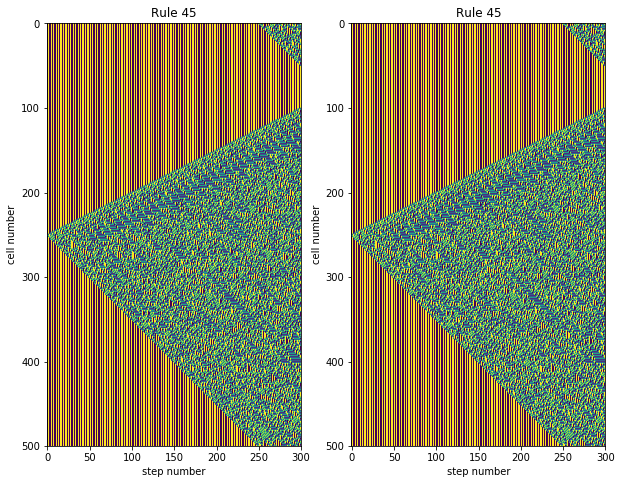

In [121]:
"""
Graph of the most random rule.
Sorry for the double graph, but it's the only way it wouldn't crash.
Bulk of code is by Prof. Feder
"""
rules = [mostRandom, mostRandom]
ncells = 500
nsteps = 300
fig, axes = plt.subplots(1, len(rules), figsize=(10,10))
for indx,rulenum in enumerate(rules):
    grid = automata1d_sequence(nsteps, ncells, rule_number=rulenum)[1]
    axes[indx].imshow(grid.T)
    axes[indx].set_xlabel('step number')
    axes[indx].set_ylabel('cell number')
    axes[indx].set_title('Rule '+ str(rulenum))

Rule 45 is supposed to be our single most random CA, based off the entropy results. The plot for rule 45 does appear to be relatively random within the initial triangle, fanning out in a fuzzy haze, but even then there's two obvious pattern-streaks to it. Firstly, on its top-right, there is a long blue streak going up, representing relatively consistent numbers as each colour corrisponds to a number. With near certainty, the numbers at that part of the row can be predicted given you know it's rule 45. Secondly, a thinner blue streak going to the bottom right near the middle. That one is less consistent, fading in and out every so often, but it can still be expected.

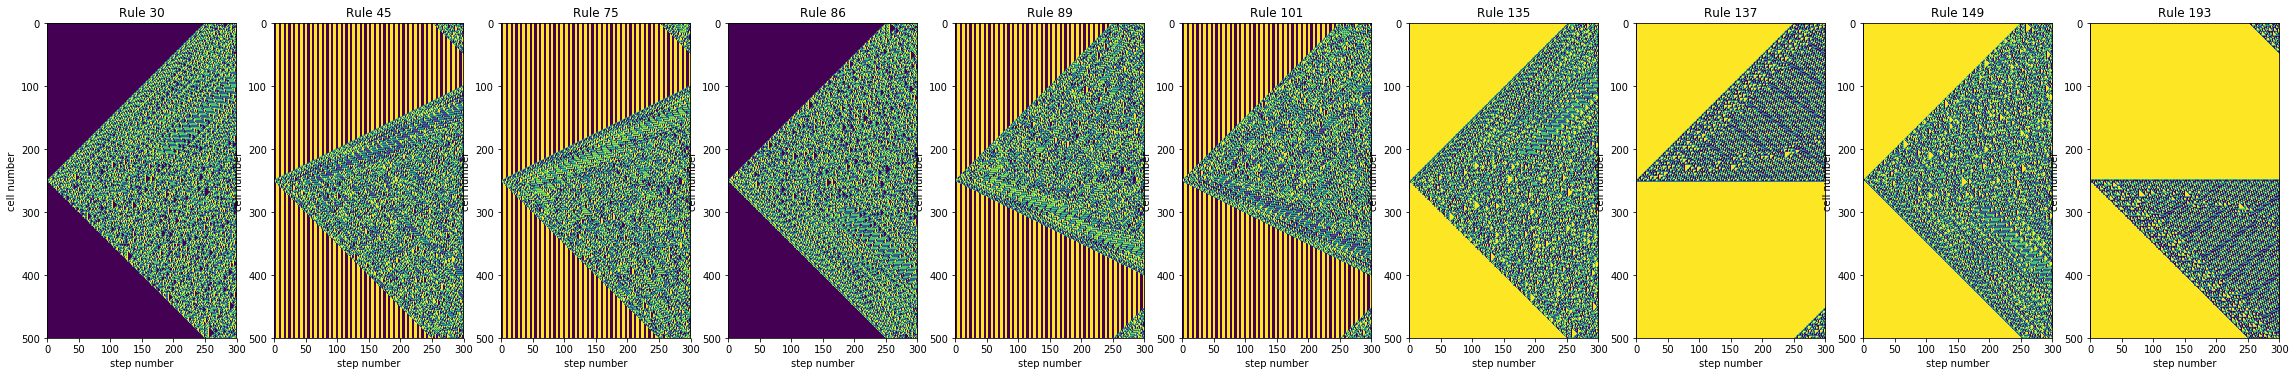

In [122]:
"""
Graph of those automatas which evenly sample over 3 bits
"""
rules = evenOverThreeBits
ncells = 500
nsteps = 300
fig, axes = plt.subplots(1, len(rules), figsize=(40,40))
for indx,rulenum in enumerate(rules):
    grid = automata1d_sequence(nsteps, ncells, rule_number=rulenum)[1]
    axes[indx].imshow(grid.T)
    axes[indx].set_xlabel('step number')
    axes[indx].set_ylabel('cell number')
    axes[indx].set_title('Rule '+ str(rulenum))

For those that evenly sample over three bits, not all of them are random, or are entirely random. Nearly all of these rules contain a huzzy side which indicates high randomness, along with a scale-like, highly ordered if strongly varying side. For example, the bottom half and top halves of rule 30, for a representative of that effect. The highly ordered side indicates that it could potentially be predicted, and in any case indicates low randomness despite the fact that any one roll would likely still come off as having high symbol entropy, as it has high consistency with the prior rolls and so could be expected from prior rolls.

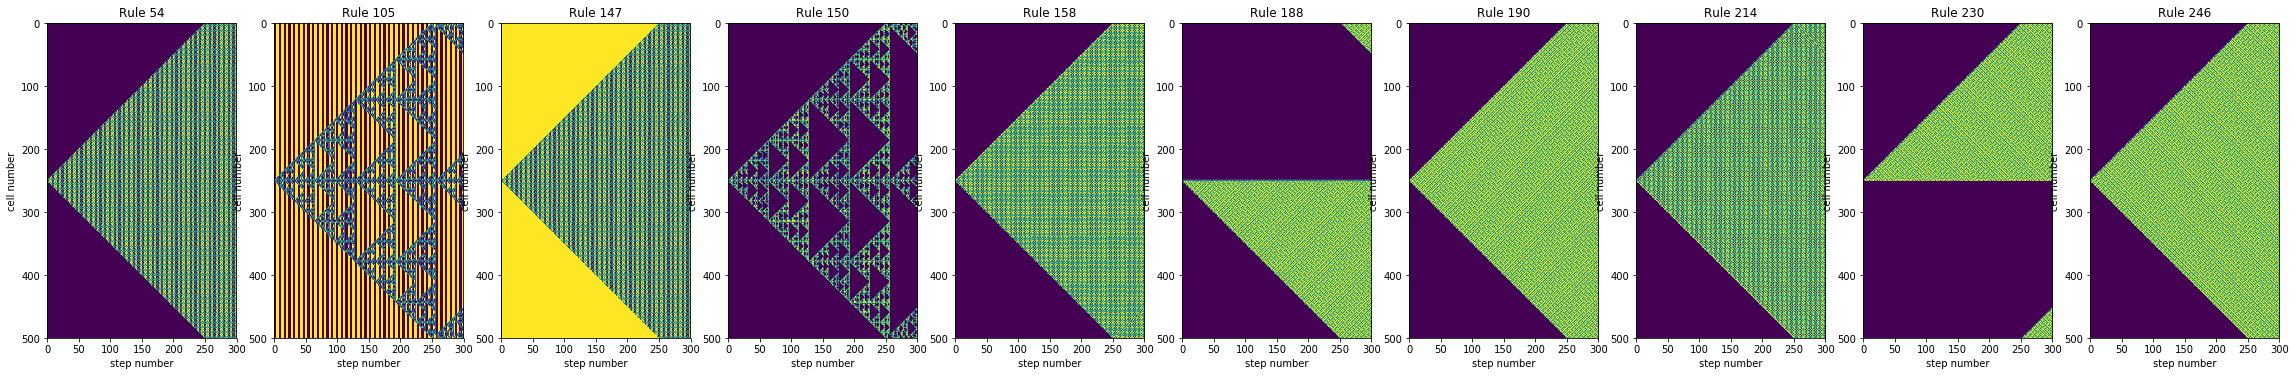

In [123]:
"""
Graph of those automatas which evenly sample over 2 bits
"""
rules = evenOverTwoBits
ncells = 500
nsteps = 300
fig, axes = plt.subplots(1, len(rules), figsize=(40,40) )
for indx,rulenum in enumerate(rules):
    grid = automata1d_sequence(nsteps, ncells, rule_number=rulenum)[1]
    axes[indx].imshow(grid.T)
    axes[indx].set_xlabel('step number')
    axes[indx].set_ylabel('cell number')
    axes[indx].set_title('Rule '+ str(rulenum))

For those which evenly sample over two bits, any semblence of randomness is thrown out of the window. It becomes extremely clear that row by row, there is a very clear and distinct geometric pattern, whether it be a striped pyramid, pyramids of pyramids on a striped background, a criss-crossed pattern or an order not unlike that of a wheat field.

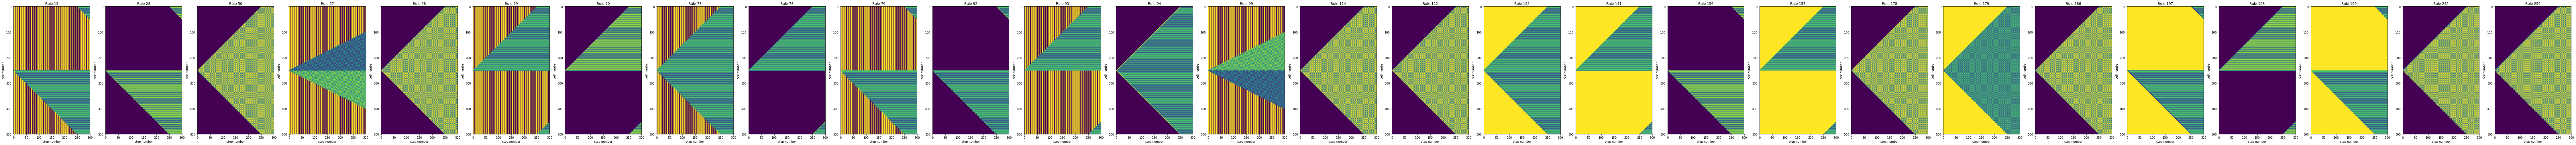

In [124]:
"""
Graph of those automatas which evenly sample over 1 bits
"""
rules = evenOverOneBits
ncells = 500
nsteps = 300
fig, axes = plt.subplots(1, len(rules), figsize=(160,160) )
for indx,rulenum in enumerate(rules):
    grid = automata1d_sequence(nsteps, ncells, rule_number=rulenum)[1]
    axes[indx].imshow(grid.T)
    axes[indx].set_xlabel('step number')
    axes[indx].set_ylabel('cell number')
    axes[indx].set_title('Rule '+ str(rulenum))

Most of even sampling over one bit is in a similar situation to even sampling over two bits, with simple yet clear geometric patterns, but the diversity in colour is further reduced. Furthermore, rule 57 is remarkable for how it divides into two even regions with swirly patterns. It almost appears 3d, though that's just a trick of the colouring.

## Overall, it is clear that not all the automatons which evenly sample over some number of bits are really random. The moment one diverges from even sampling over 3 bits, and even then once one only gets a little less than that, there rapidly emerges clear and consistent geometric patterns, as noted in the comments above. Few of these plots really 'look' random; only rule 45 comes close and even then there's some hidden structure.

**Problem (30 points):** Write a Python program to show the behaviour of totalistic code 912, and compare the output with that found at http://mathworld.wolfram.com/Code912.html. Now test the entropies for all 2187 possible totalistic CA (be sure to use base-3!) to find the rules with the highest entropies. Plot a few of these over some time interval.

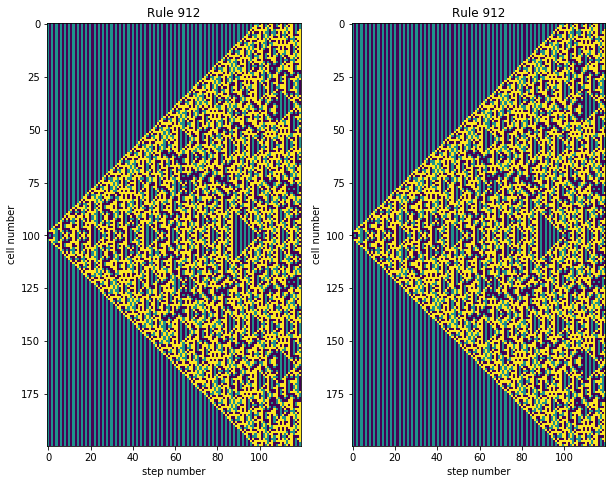

In [125]:
"""
This function converts an input decimal integer into its ternary form.
"""
def toTernary (num):
    if num == 0:
        return [0,0,0,0,0,0,0]
    nums = []
    while num != 0:
        num, remainder = divmod(num, 3)
        nums.append(remainder)
    while len(nums) < 7:
      nums.append(0)
    return nums[::-1]
  
#Problem #2
"""
This code by Prof. Feder, with some modifications by me.
The modifications mostly mean returning the triple value list
and turning it into the ternary totalistic format instead.
"""

def ternaryCellStep(value, ruleNumber):
# Apply a 3-bit transition rule to a list of binary cell states.
    # Express rule as a ternary array string (John)
    lookup = toTernary(ruleNumber)
    lookup = np.array(lookup)
    # print(lookup)

    # look only at the neighbourhood of a specific site, and express in base 3: (John)
    triple = np.roll(value,+1) + value + np.roll(value,-1)
    # print("New Triple")
    #print(triple)
    # print(lookup[triple])
  
    return lookup[triple], triple 
  
"""
This code by Prof. Feder with some mods by me.
The modifications mean returning the integer array
and having it process the ternary totalistic
format instead of the usual automaton format.
"""
def automataTernarySequence(nsteps, ncells, rule_number, seed=None):
  
    # initialize the state to zero on all cells. Added in the int array (John)):
    value = np.zeros(ncells, dtype=np.int8)
    ints = np.zeros(ncells, dtype=np.int8)
  
    # set the value of the middle cell to 1:
    value[ ncells//2 ] = 1
    
    grid = np.ndarray( [nsteps, ncells], dtype=np.int8)
    intGrid = np.ndarray( [nsteps, ncells], dtype=np.int8) #Integer Grid (John)
    for n in range(nsteps):
        value, ints = ternaryCellStep(value, rule_number)
        grid[n,:] = value
        intGrid[n,:] = ints #Record the ints for that step.
    
    return (np.array( [grid] ).reshape(nsteps,ncells).astype(np.uint8)), (np.array( [intGrid] ).reshape(nsteps,ncells).astype(np.uint8)) # Second part of the tuple is an integer array corrisponding to the 3-bit integers at each step of the automata.

#Graphing it out for rule 912.
#Comparison is with http://mathworld.wolfram.com/Code912.html
rules = [912, 912]
ncells = 50*4
nsteps = 30*4
fig, axes = plt.subplots(1, len(rules), figsize=(10,10) )
for indx,rulenum in enumerate(rules):
    grid = automataTernarySequence(nsteps, ncells, rule_number= rulenum)[0]
    axes[indx].imshow(grid.T)
    axes[indx].set_xlabel('step number')
    axes[indx].set_ylabel('cell number')
    axes[indx].set_title('Rule '+ str(rulenum))

Comparing our graph to that of code 912 on Wolfram, I can see that one of the major differences off the bat is that we have striked background whilst Wolfram's does not, instead focusing on the core structure. As for our core structures, however, it appears we get largely the same sub-patterns (fringed border, triangles, u-shapes), but they are not necessarily organized in the exact same way, possibly due to a differing starting condition. Overall our 912 compares favorably to theirs.

In [126]:
"""
Number of steps to run the automatas, 
number of cells in said automata.
"""
nsteps = 200
ncells = 100

rules = [x for x in range(2187)]
#rules = [912, 13] #Test Rules

"""
Get the celluar automata matrixes for the number of cells and steps
for each and every rule in our rule list, inserted in ascending order.
"""
results = []
for entry in rules:
    results.append(automataTernarySequence(nsteps, ncells, entry)[1])
    #print("Making results.")

#print(results[109])
"""
Snipe off the last rows in each of the results
"""
lastRows = []
for entry in results:
    lastRows.append(entry[-1])

#print(symbol_entropy(lastRows[8]))
#print(results[-1][-1]==lastRows[-1]) Making sure append does the right thing

"""
Calculate the entropies of each of the last rows.
"""
entropies = []
for entry in lastRows:
    entryEntropy = symbol_entropy(entry)
    entropies.append(entryEntropy)
    #print(entryEntropy, 2**entryEntropy)

"""
Find those with a cutoff for which I'd consider it to be high entropy.
"""

highEntropy = [x for x in range(1, 2187) if entropies[x-1] > 2.72]

print("These Totalistic Rules have over 2.72 in entropy:")
for rule in highEntropy:
    print("\t {}".format((rule, entropies[rule-1])))

These Totalistic Rules have over 2.72 in entropy:
	 (418, 2.7227194473046454)
	 (631, 2.731979876612262)
	 (718, 2.7209803066315095)
	 (907, 2.7375314422316985)
	 (1244, 2.7544517740801053)
	 (1542, 2.7209803066315095)
	 (1595, 2.743497671486163)
	 (1842, 2.7227194473046454)


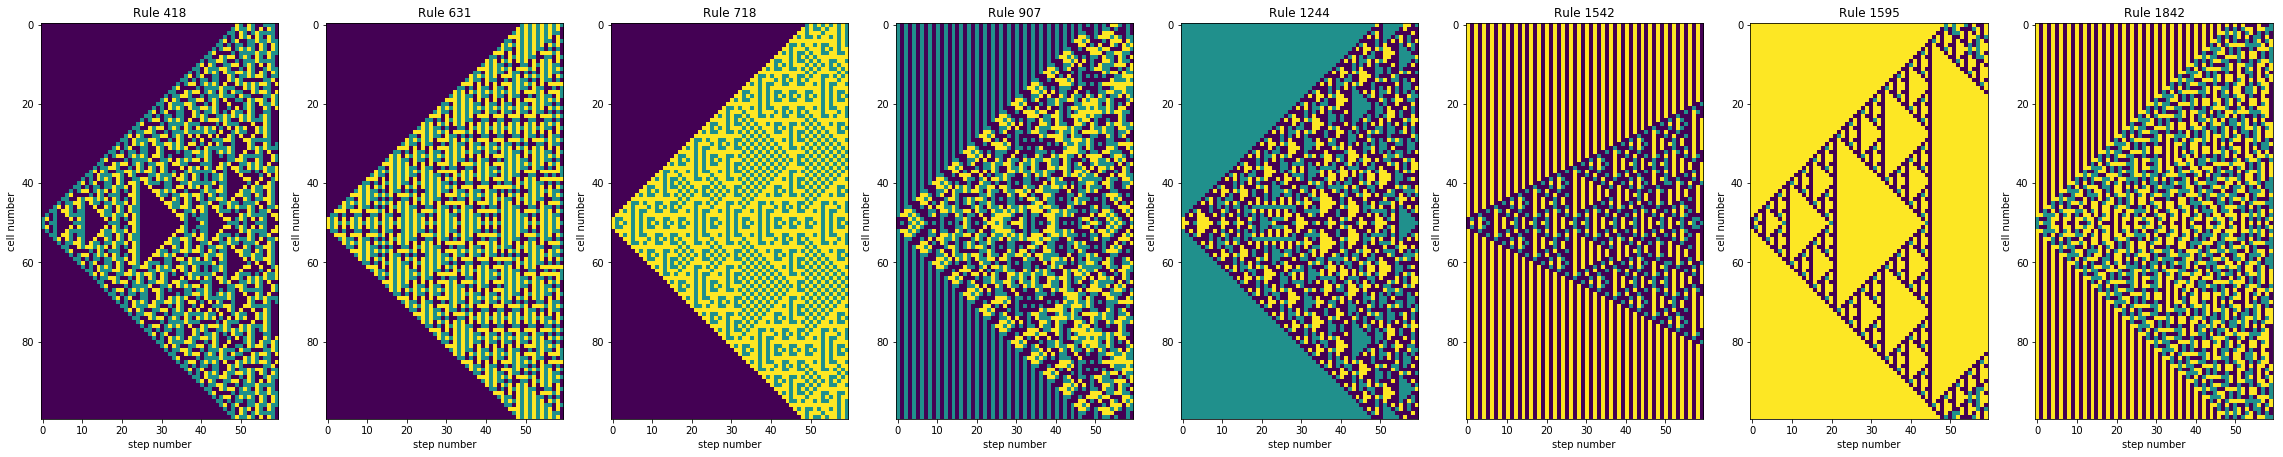

In [127]:
rules = highEntropy
ncells = 50*2
nsteps = 30*2
fig, axes = plt.subplots(1, len(rules), figsize=(40,40) )
for indx,rulenum in enumerate(rules):
    grid = automataTernarySequence(nsteps, ncells, rule_number= rulenum)[0]
    axes[indx].imshow(grid.T)
    axes[indx].set_xlabel('step number')
    axes[indx].set_ylabel('cell number')
    axes[indx].set_title('Rule '+ str(rulenum))

As we can see, all of the plots for all of the totalistic rules with the highest entropies all feature strong geometric patterns, with triangle and U-shapes featuring most prominantly, along with a certain fringe to the end. They are also very pretty.

### On the Bonus:


# 2.5.4 Assignment 3 Problem (20 point BONUS): Animate the game of life

**Problem (10 points):** Choose an interesting game of life rule (like not a very low-number rule). Plot the cell values (0 for white, 1 for black) on some large grid (perhaps 50 x 50 cells) for each timestep, starting with one or more black cells placed randomly over the grid. Combine these plots over several timesteps into a movie to see the evolution of the 2D totalistic cellular automaton.


It's like the cell step and the automata sequence functions, only now we feed in 2d arrays and then do something else with specifying the rules. Here:


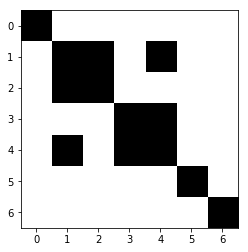

In [0]:
##heres out attempt

import numpy as np
import matplotlib.pyplot as plt


universe = np.identity(7,dtype=int)

beacon = [[1, 1, 0, 1],
          [1, 1, 0, 0],
          [0, 0, 1, 1],
          [1, 0, 1, 1]]
universe[1:5, 1:5] = beacon

#print(universe)


plt.imshow(universe, cmap='binary')
plt.show()

In [0]:
def survival(x, y, universe):
    """
    :param x: x coordinate of cell in the universe

    :param y: y coordinate of cell in the universe

    :param universe: the universe of cells

    """
    num_neighbours = np.sum(universe[x - 1 : x + 2, y - 1 : y + 2]) - universe[x, y]
    #rules of Life
    if universe[x, y] and not 2 <= num_neighbours <= 3:
        return 0
    elif num_neighbours == 3:
        return 1
    return universe[x, y]
  
def generation(universe):
    """
    :param universe: initial universe of cells
 
    :return: updated universe of cells
 
    """
    new_uni = np.copy(universe)
    # Apply the survival function to every cell in the universe
    for i in range(int(universe.shape[0])):
        for j in range(int(universe.shape[1])):
            new_uni[i, j] = survival(i, j, universe)
        plt.imshow(new_uni, cmap='binary')
        plt.show()
    return new_uni


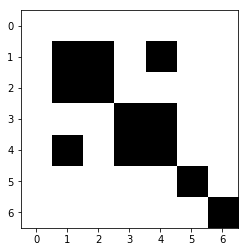

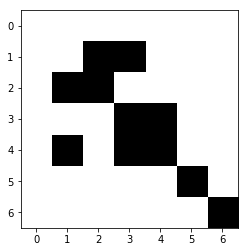

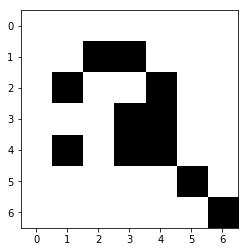

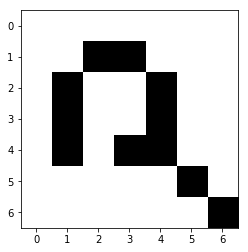

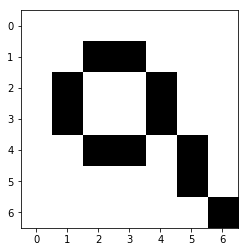

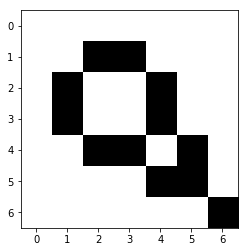

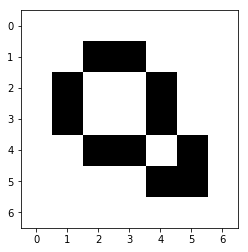

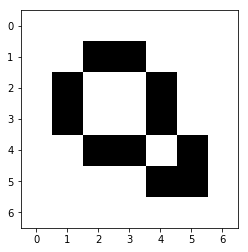

In [0]:
plt.imshow(generation(universe), cmap='binary')
plt.show()